In [1]:
import os
import sys
import warnings

warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath("../Scripts"))

In [2]:
from data_processing import load_data, performance_data

### Load and Explore the Data

In [3]:
#Load the Movie rating prediction dataset
df = load_data()

In [4]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.shape

(15509, 10)

In [6]:
#Get info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
#Stastical summary of numrical variable
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Handle Missing Value

#### Analysis missing value

In [8]:
from preprocessing import missing_value,missing_value_bar,handel_missing_value

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


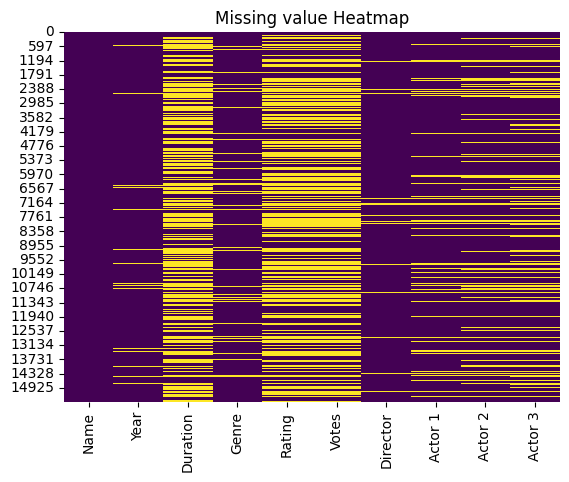

In [9]:
#Check missing values
missing_value(df)

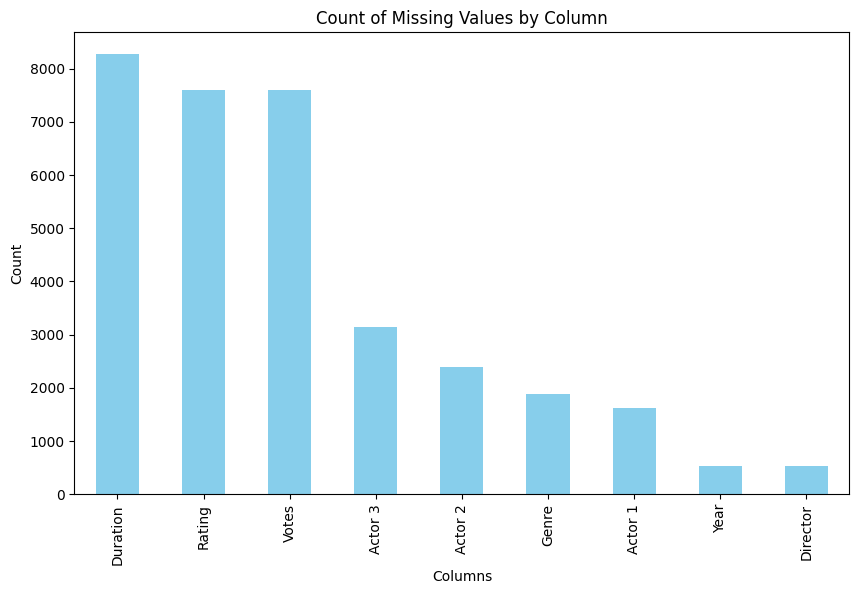

In [10]:
# Bar plot for missing values
missing_value_bar(df)

In [11]:
from visualization_data import visual_distribution_target_value,visual_numerical_feature,votes_rating,top_genre_movies,top_directors,correlation,actual_prediction

In [12]:
df = handel_missing_value(df)

0


#### Distribution of Target Variable (Rating)

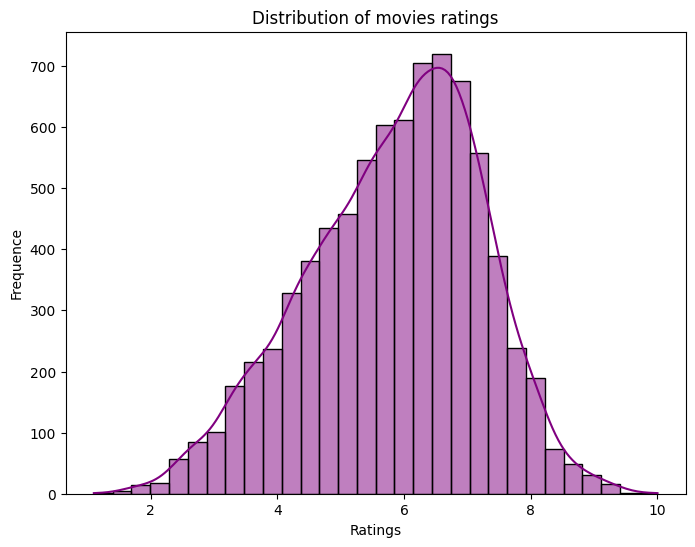

In [13]:
visual_distribution_target_value(df)

### Analyze Numerical Features

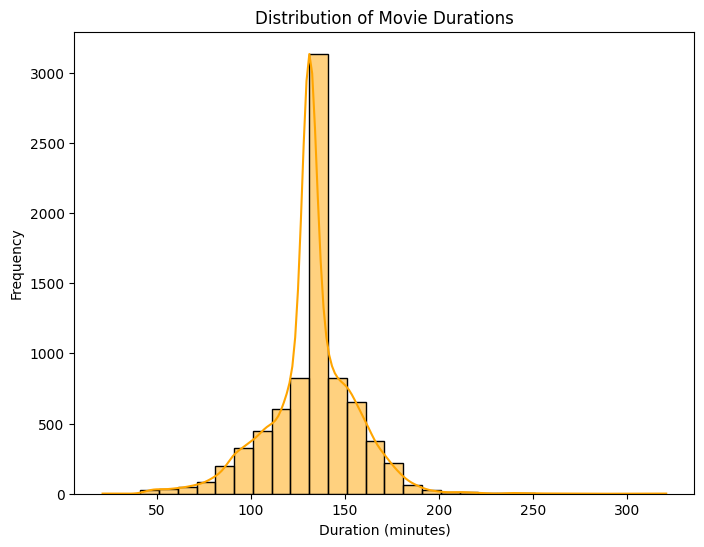

In [14]:
#Analyise numerical feature
visual_numerical_feature(df)

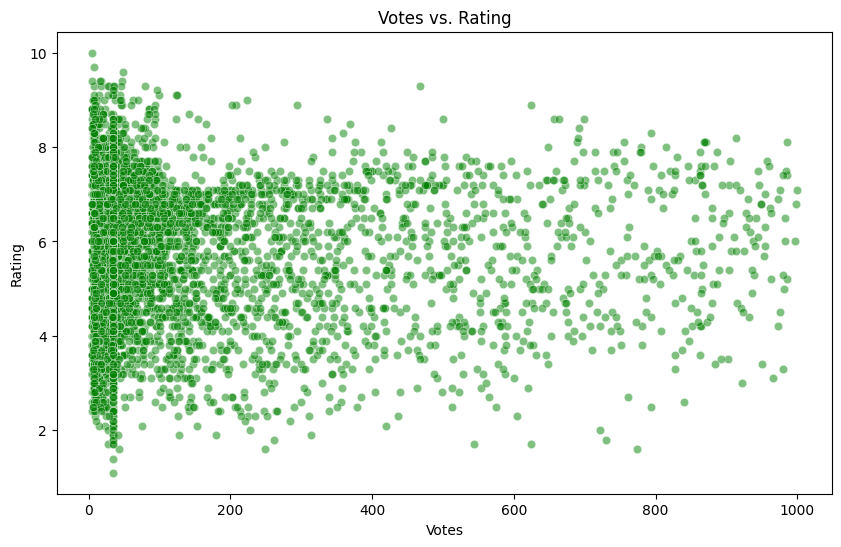

In [15]:
#Votes vs Rating
votes_rating(df)

#### Analyze Categorical Features

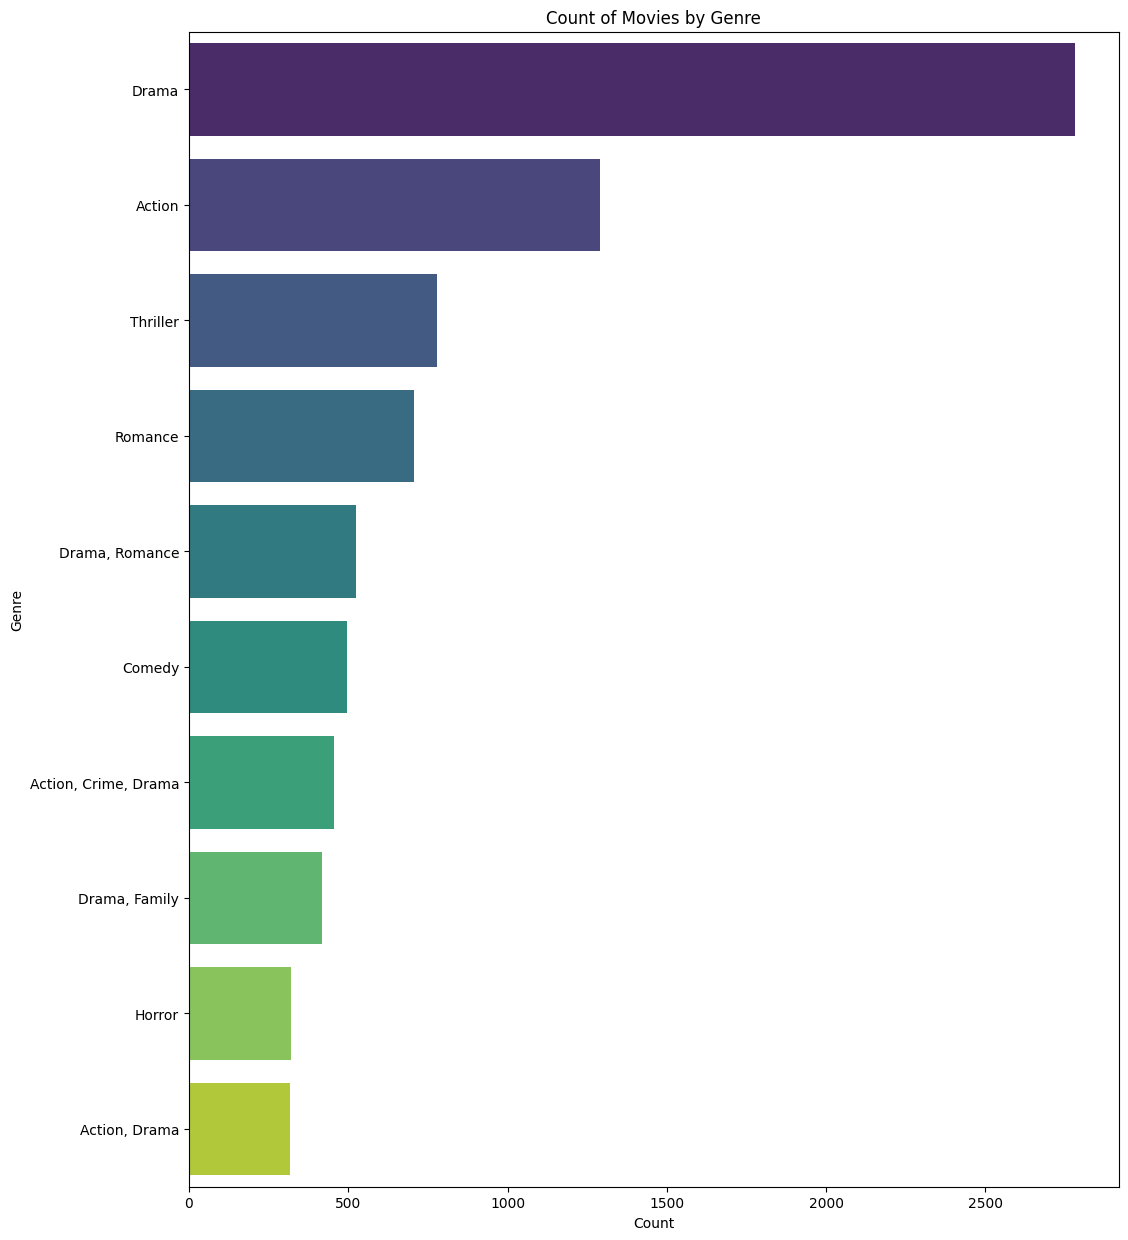

In [43]:
#Top Genre Movies
top_genre_movies(df)

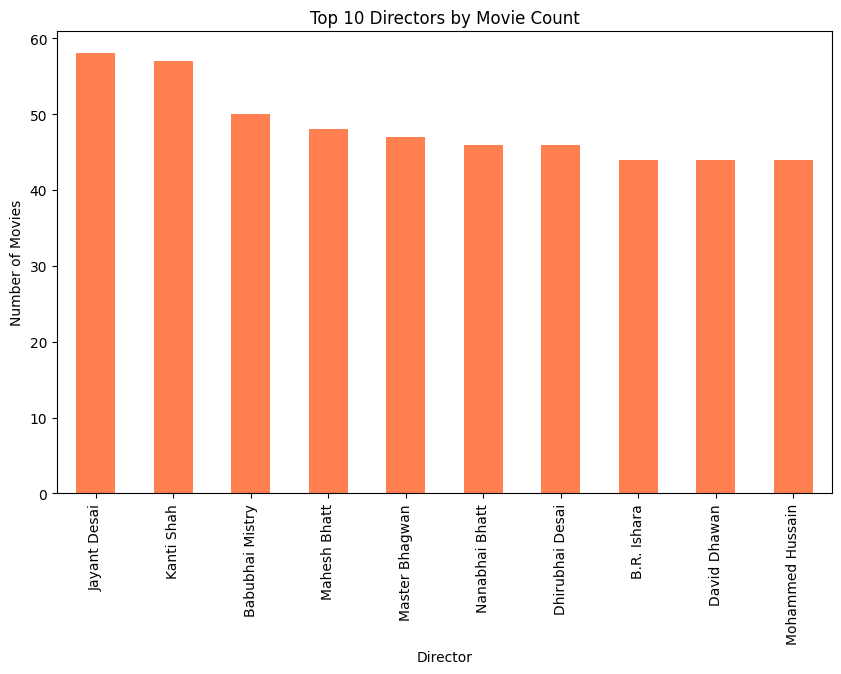

In [33]:
#Top Directors
top_directors(df)

### Encode Categorical Variables

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Genre','Director','Actor 1','Actor 2','Actor 3']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Feature Engineering

```Actor Popularity: A sum of encoded values for actors.```<br>
```Director Popularity: Based on aggregated ratings for each director.```

In [17]:
df['Actor Popularity'] = df['Actor 1'] + df['Actor 2'] + df['Actor 3']
df['Director Popularity'] = df['Director']

#### Correlation Analysis

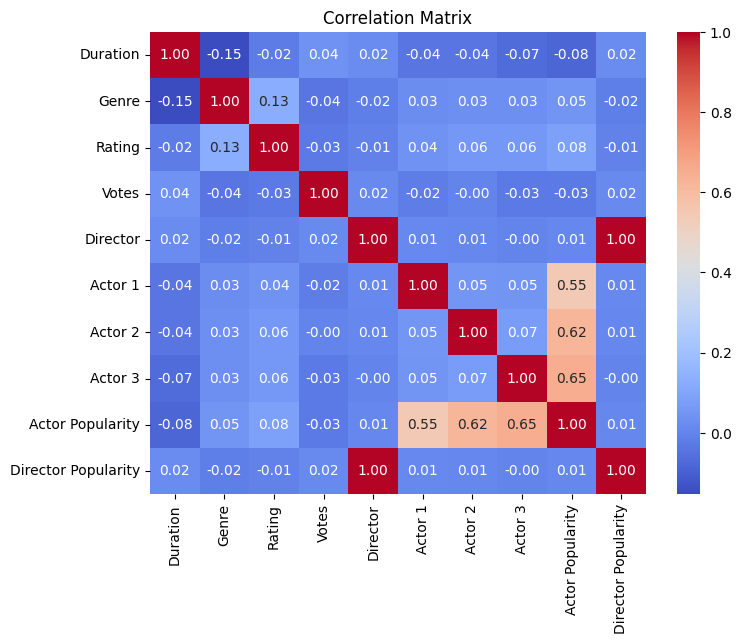

In [18]:
correlation(df)

#### Split Data into Train and Test Sets

In [19]:
from sklearn.model_selection import train_test_split
X = df[['Duration', 'Genre', 'Votes', 'Actor Popularity', 'Director Popularity']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train models

In [20]:
from train_model import train_model,feature_important,prediction

In [21]:
#Random forest Regression
rf_model = train_model(X_train,y_train)
rf_model

RandomForestRegressor(random_state=42)

In [22]:
#predictions
y_pred = prediction(rf_model,X_test)
y_pred

array([4.914, 4.036, 5.837, ..., 4.869, 5.964, 6.589])

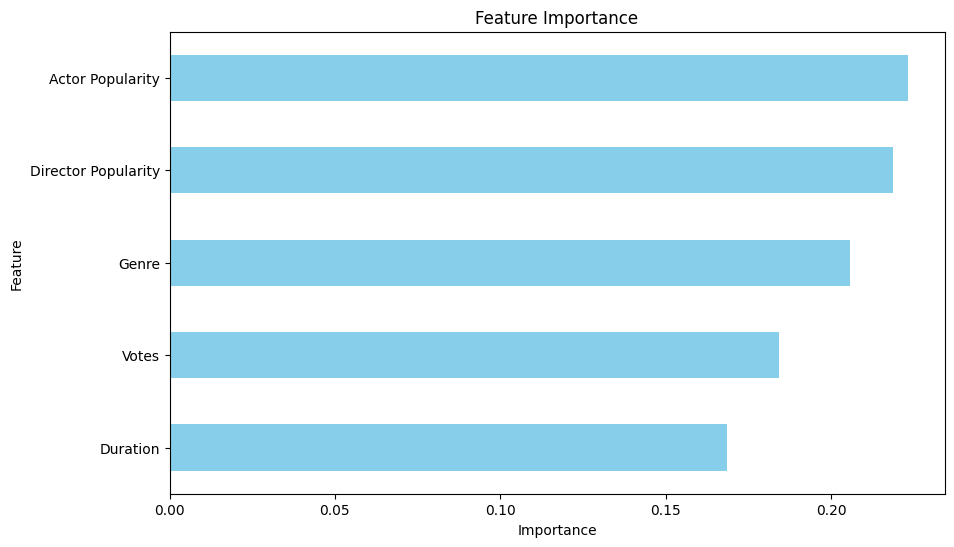

In [23]:
# rf_model is the trained RandomForestRegressor
feature_important(rf_model,X,)

### Evaluation the model

In [24]:
from evaluate import evaluation,display_predictions

In [25]:
# Evaluation metrics
evaluation(y_test,y_pred)

Mean Absolute Error (MAE): 1.0144045875420875
Mean Squared Error (MSE): 1.63149159500982
Root Mean Squared Error (RMSE): 1.2772985535926282
R-squared (R2): 0.12245065791584042


### Visualize the Result

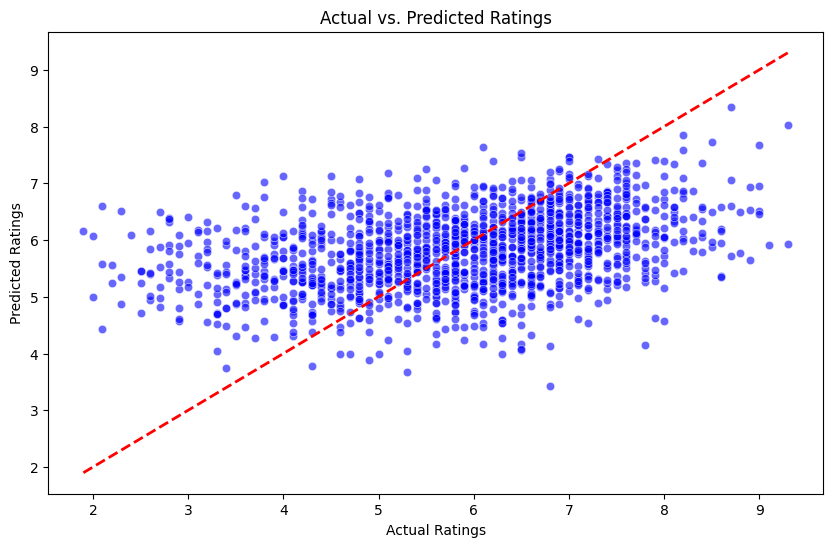

In [ ]:
#Display the actual vs prediction
actual_prediction(y_test,y_pred)

In [29]:
#Display the prediction
display_predictions(X_test,y_pred)

X test: {'Duration': 131.0, 'Genre': 408.0, 'Votes': 6.0, 'Actor Popularity': 2532.0, 'Director Popularity': 822.0} | Predicted: 4.914
X test: {'Duration': 125.0, 'Genre': 15.0, 'Votes': 711.0, 'Actor Popularity': 6935.0, 'Director Popularity': 2146.0} | Predicted: 4.036000000000005
X test: {'Duration': 133.0, 'Genre': 14.0, 'Votes': 35.0, 'Actor Popularity': 3364.0, 'Director Popularity': 85.0} | Predicted: 5.837000000000002
X test: {'Duration': 126.0, 'Genre': 268.0, 'Votes': 242.0, 'Actor Popularity': 4378.0, 'Director Popularity': 395.0} | Predicted: 6.263
X test: {'Duration': 115.0, 'Genre': 362.0, 'Votes': 11.0, 'Actor Popularity': 5452.0, 'Director Popularity': 2817.0} | Predicted: 4.301000000000003
